<a href="https://colab.research.google.com/github/lmcanavals/dip/blob/main/05_01_filtering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

In [3]:
def show(im, size=8, color=None):
  _, ax = plt.subplots(figsize=(size, size))
  if color:
    ax.imshow(im, interpolation="nearest", cmap=color)
  else:
    ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

In [4]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [10]:
img1 = "bird.png"
url = f"{base}{img1}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  266k  100  266k    0     0  1194k      0 --:--:-- --:--:-- --:--:-- 1194k


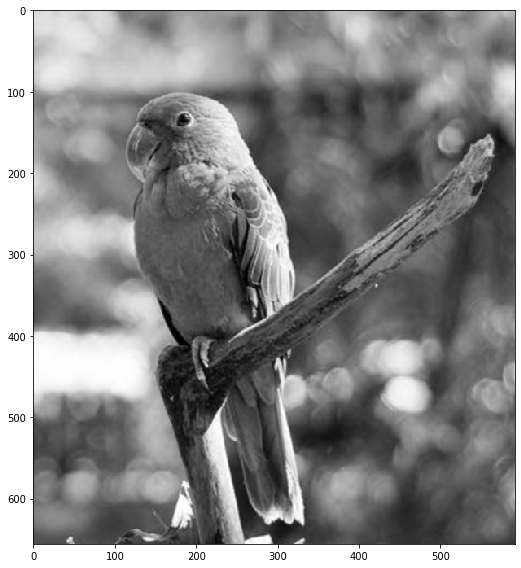

In [11]:
bird = loadImg(img1)
show(bird)

(656, 592)


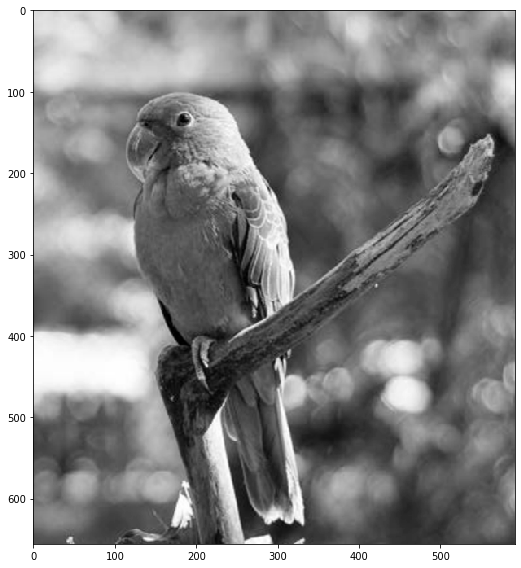

In [12]:
birdgs = cv2.cvtColor(bird, cv2.COLOR_BGR2GRAY)
print(birdgs.shape)
show(birdgs, color="gray")

In [16]:
def testMask(im, mask):
  im2 = cv2.filter2D(src=im, ddepth=-1, kernel=mask)
  plt.subplots(figsize=(15, 15))
  plt.subplot(1, 2, 1)
  plt.imshow(im, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(im2, cmap="gray")
  plt.axis("off")
  plt.show()

In [25]:
def gaussianMask(l=3, sig=1.0):
  ax = np.linspace(-(l-1) / 2.0, (l-2) / 2.0, l)
  xx, yy = np.meshgrid(ax, ax)
  kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

  return kernel / np.sum(kernel)

In [27]:
gaussianMask(5)

array([[0.00236499, 0.00928091, 0.01693736, 0.01437455, 0.00567331],
       [0.00928091, 0.03642106, 0.06646727, 0.05641004, 0.02226375],
       [0.01693736, 0.06646727, 0.12130064, 0.10294652, 0.04063063],
       [0.01437455, 0.05641004, 0.10294652, 0.08736957, 0.03448276],
       [0.00567331, 0.02226375, 0.04063063, 0.03448276, 0.01360955]])

[[0.06087649 0.09728035 0.08857477]
 [0.09728035 0.15545356 0.14154208]
 [0.08857477 0.14154208 0.12887553]]


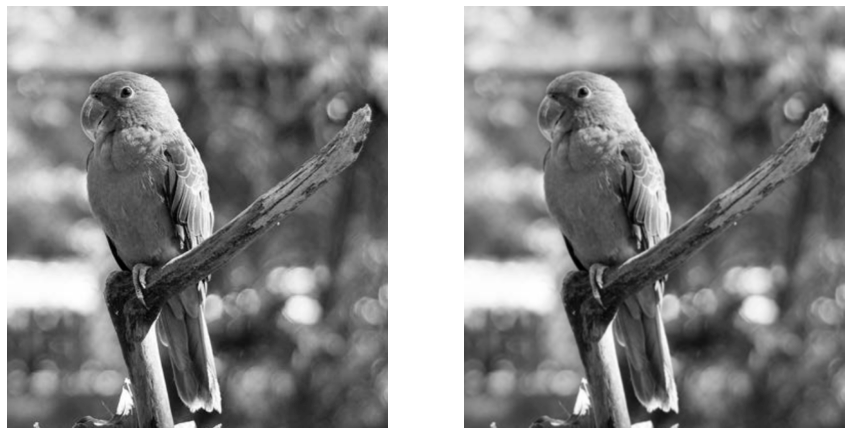

In [28]:
mask = gaussianMask(3)
print(mask)
testMask(birdgs, mask)

[[0.00236499 0.00928091 0.01693736 0.01437455 0.00567331]
 [0.00928091 0.03642106 0.06646727 0.05641004 0.02226375]
 [0.01693736 0.06646727 0.12130064 0.10294652 0.04063063]
 [0.01437455 0.05641004 0.10294652 0.08736957 0.03448276]
 [0.00567331 0.02226375 0.04063063 0.03448276 0.01360955]]


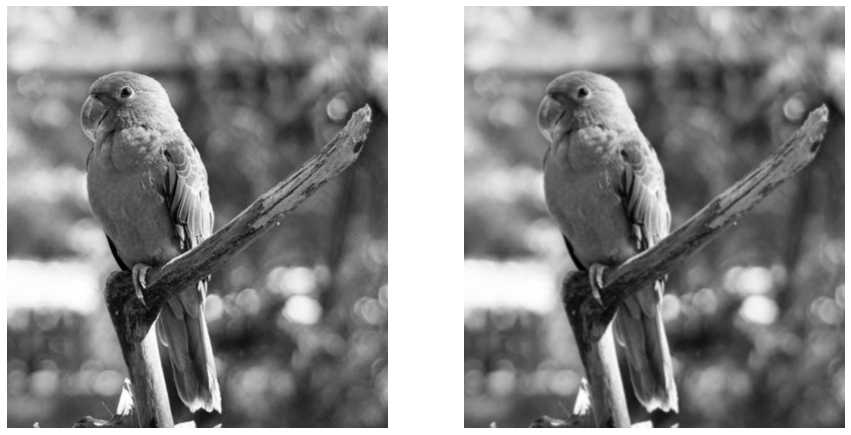

In [29]:
mask = gaussianMask(5)
print(mask)
testMask(birdgs, mask)

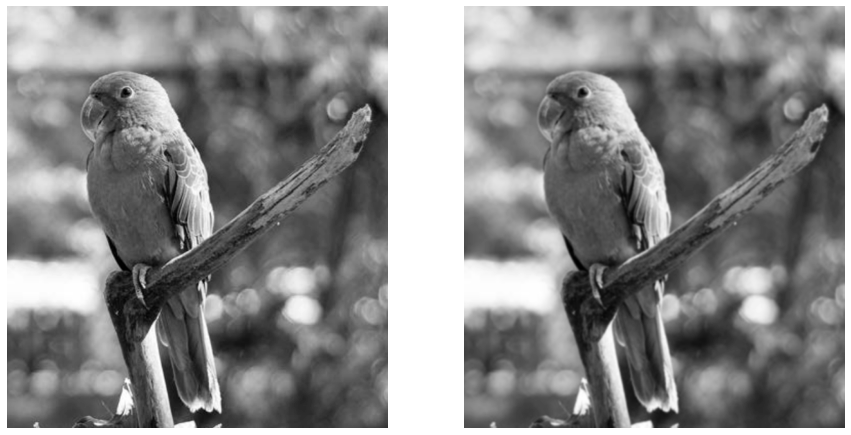

In [33]:
mask = gaussianMask(11, 1)
testMask(birdgs, mask)

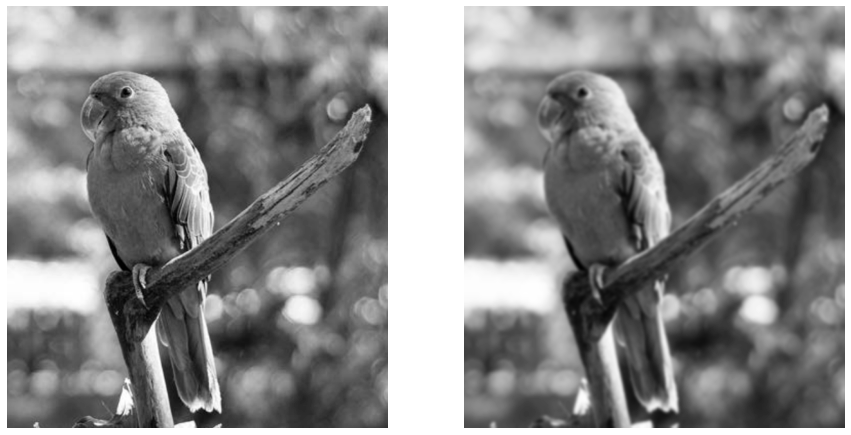

In [34]:
mask = gaussianMask(11, 2)
testMask(birdgs, mask)

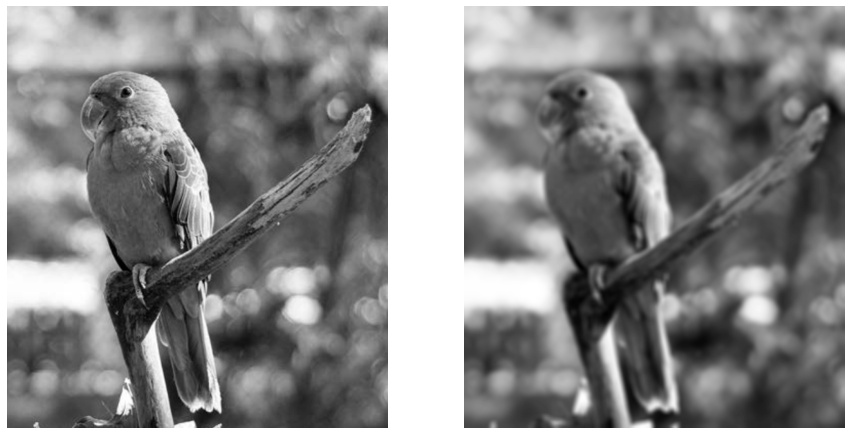

In [35]:
mask = gaussianMask(11, 4)
testMask(birdgs, mask)

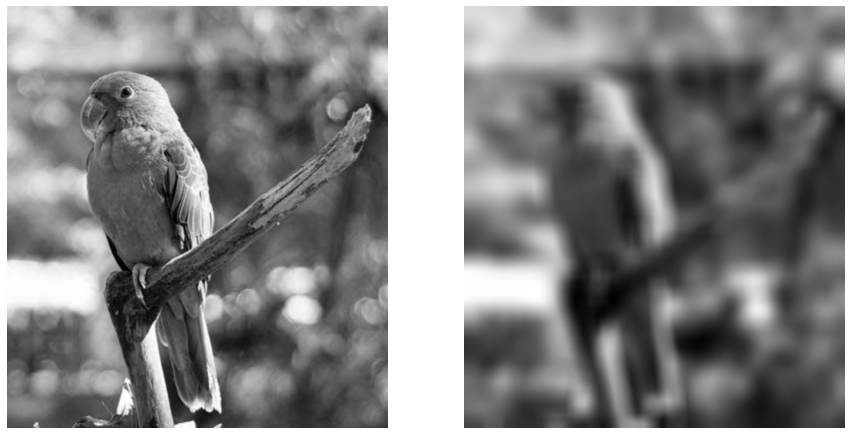

In [36]:
mask = gaussianMask(31, 150)
testMask(birdgs, mask)

In [20]:
img2 = "noise2.png"
url = f"{base}{img2}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48819  100 48819    0     0   234k      0 --:--:-- --:--:-- --:--:--  234k


### Min filter and Max Filter

In [60]:
def testMask2(im, l):
  im2 = minfilter(im, l)
  plt.subplots(figsize=(15, 15))
  plt.subplot(1, 2, 1)
  plt.imshow(im, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(im2, cmap="gray")
  plt.axis("off")
  plt.show()

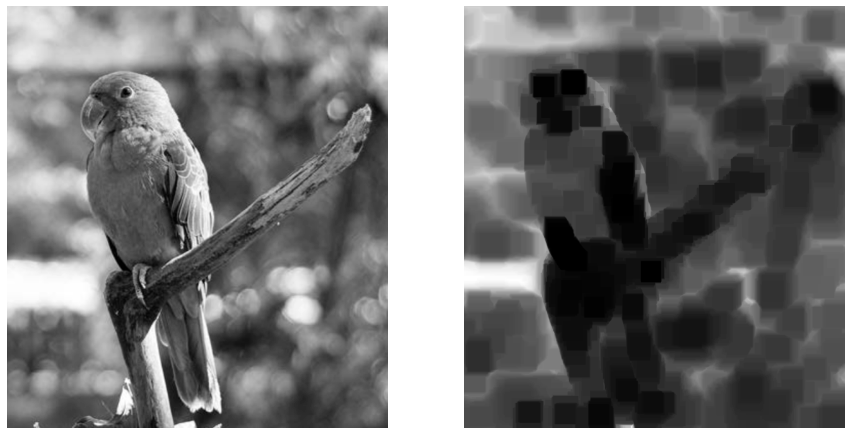

In [59]:
testMask2(birdgs, 31)

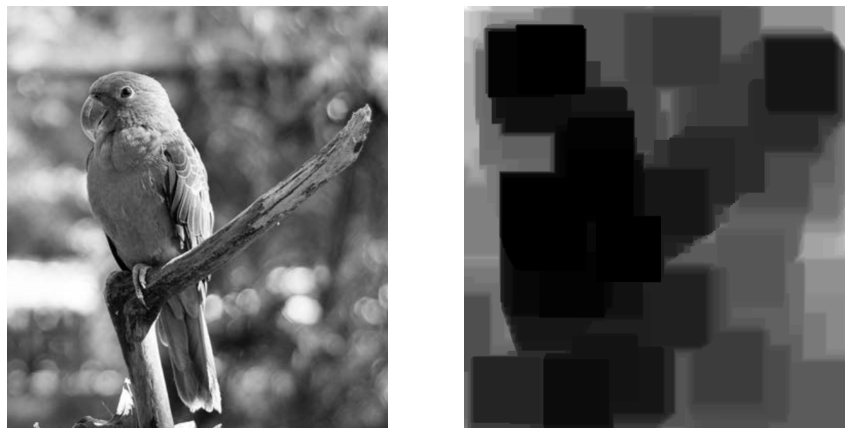

In [61]:
testMask2(birdgs, 101)

### Mediana ponderada

In [97]:
def filtering(im, mask):
  rowsMask, colsMask = mask.shape
  rowPadding = rowsMask // 2
  colPadding = colsMask // 2

  rows, cols = im.shape

  temp = np.zeros((rows + 2*rowPadding, cols + 2*colPadding))
  temp[rowPadding:rowPadding+rows, colPadding:colPadding+cols] = im

  out = np.zeros_like(temp)

  for r in range(rows):
    for c in range(cols):
      accum = []
      for i in range(rowsMask):
        for j in range(colsMask):
          accum.extend([temp[r + i, c + j]]*mask[i, j])
      out[r + rowPadding, c + colPadding] = np.median(np.array(accum))

  return out[rowPadding:rowPadding+rows, colPadding:colPadding+cols]

In [75]:
def testMask(im, mask):
  im2 = filtering(im, mask)
  plt.subplots(figsize=(20, 20))
  plt.subplot(1, 2, 1)
  plt.imshow(im, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(im2, cmap="gray")
  plt.axis("off")
  plt.show()

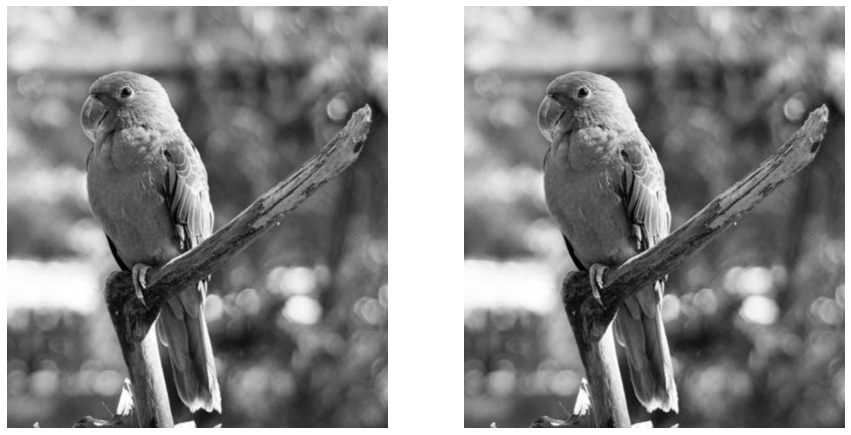

In [67]:
testMask(birdgs, np.array([1, 2, 1, 2, 3, 2, 1, 2, 1]).reshape(3, 3))

In [68]:
img2 = "noise2.png"
url = f"{base}{img2}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48819  100 48819    0     0   264k      0 --:--:-- --:--:-- --:--:--  264k


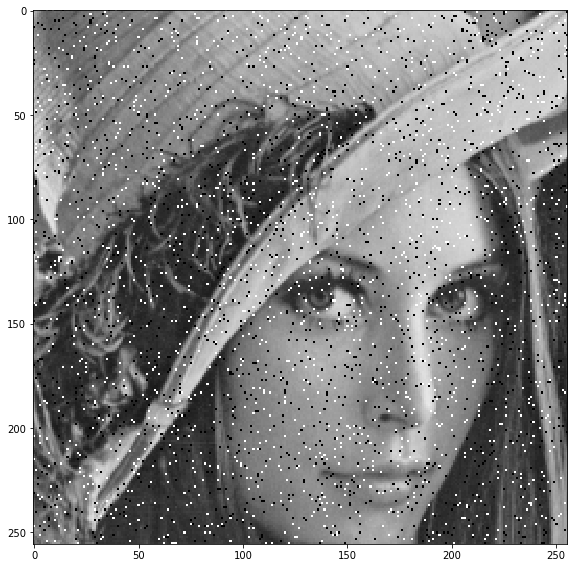

In [69]:
noise1 = loadImg(img2)
show(noise1)

In [70]:
noise = cv2.cvtColor(noise1, cv2.COLOR_BGR2GRAY)
print(noise.shape)

(256, 256)


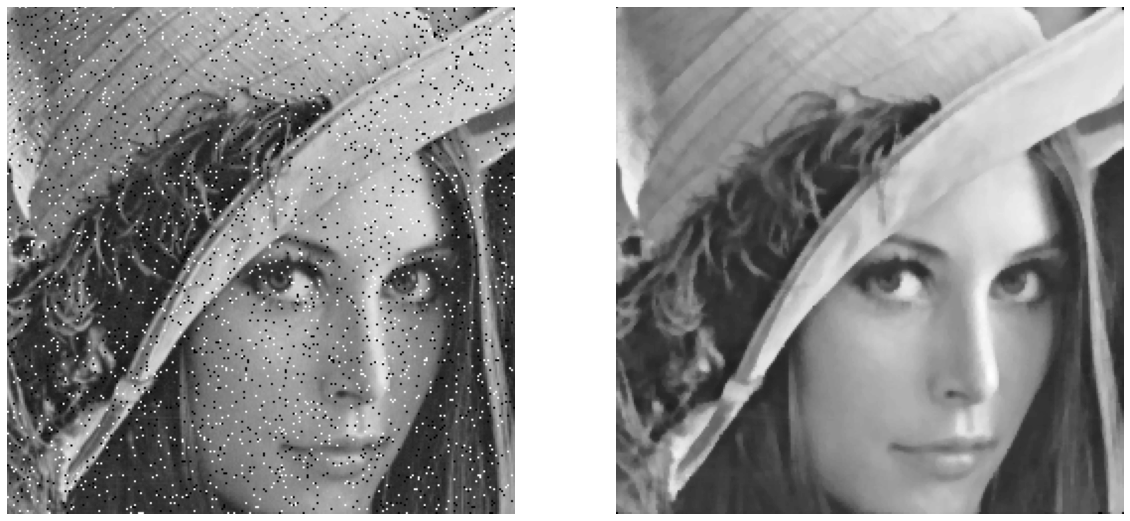

In [98]:
mask = np.array([1, 2, 4, 8, 4, 2, 1,
                 2, 4, 8, 16, 8, 4, 2,
                 4, 8, 16, 32, 16, 8, 4,
                 8, 16, 32, 64, 32, 16, 8,
                 4, 8, 16, 32, 16, 8, 4,
                 2, 4, 8, 16, 8, 4, 2,
                 1, 2, 4, 8, 4, 2, 1]).reshape(7, 7)
testMask(noise, mask)

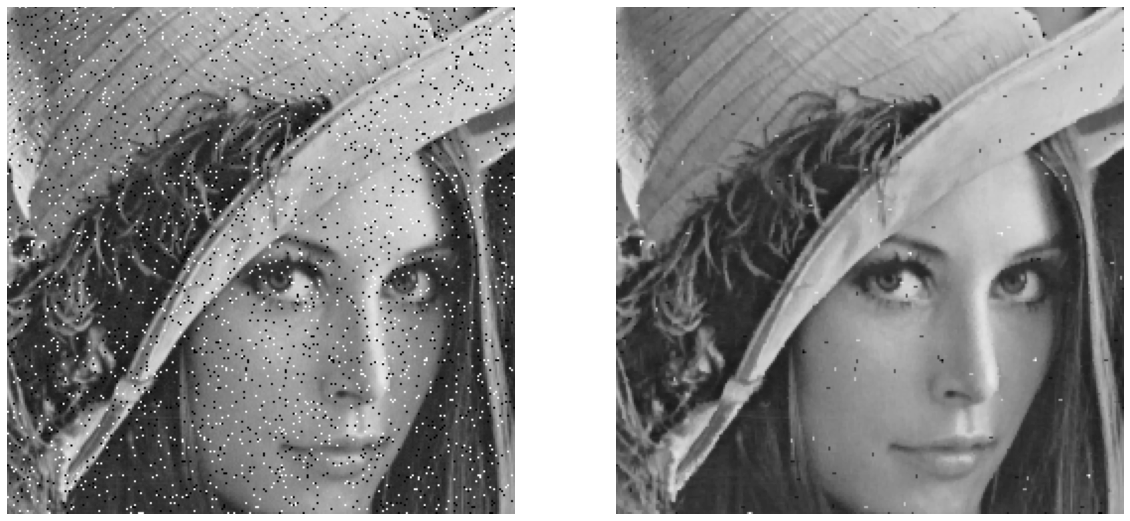

In [101]:
mask = np.array([0, 1, 0,
                 1, 2, 1,
                 0, 1, 0]).reshape(3, 3)
testMask(noise, mask)